### 2021_09_15_4 5 6

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [19]:
# 파일 저장 -> [].to_csv()
# 파일 읽기 -> _변수이름 = pd.read_csv("__경로_파일명", __)
# train : 학습할 용도
# test : 실제(답이 없는) 문제
# sub : OMR답안지
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

print("train shape :", train.shape)
print("test shape :", test.shape)
print("sub shape :", sub.shape)

train shape : (891, 12)
test shape : (418, 11)
sub shape : (418, 2)


* 01 앞뒤의 5개의 행 보기 [].head(), [].tail()
* 02 데이터 통계량 보기   [].describe()
* 03 정보 확인하기       [].info()
* 04 열 확인하기         [].columns
* 05 행과 열 확인하기     [].shape
* 06 상위 N행 살펴보기    [].head(N)
* 07 하위 N행 살펴보기.   [].tail(N)
* 08 통계량 계산         [].mean(), [].max(), [].median()

* train.head() 데이터 확인
* 데이터 개수 확인 : train : 891개, test : 418개, sub : 418개

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
print(train.columns)
print(test.columns)
print(sub.columns) # train에는 Survived가 있고, test에는 없다.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


In [10]:
# 숫자값 이외의 다른 데이터 통계값 보기
train.describe(include = "O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
print("train shape :", train.shape)
print("test shape :", test.shape)
print("sub shape :", sub.shape)

print("===== train info =====")
print(train.info())
print("===== test info =====")
print(test.info())
print("===== sub info =====")
print(sub.info())

print(train.head(5))
# print(test.head(5))
# print(sub.head(5))

train shape : (891, 12)
test shape : (418, 11)
sub shape : (418, 2)
===== train info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
===== test info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non

In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
train.isnull() # 값이 비어있는지 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

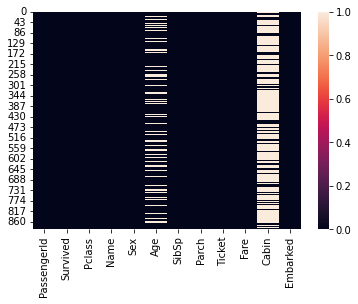

In [24]:
sns.heatmap(train.isnull())

In [25]:
train.describe(include = "O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:xlabel='Survived', ylabel='count'>

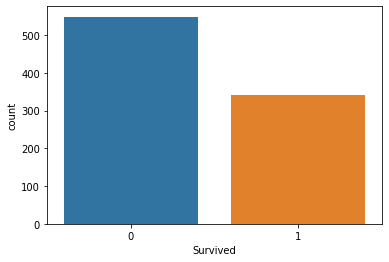

In [27]:
sns.countplot(x = "Survived", data = train)

* 생존자가 적다.
* 사망자가 500명 이상이다.
* 생존자가 300 ~ 350명 사이이다.

In [29]:
## survived
# 01 pclass별 생존자
# 02 성별 생존자
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 01 pclass별 생존자

<AxesSubplot:xlabel='Pclass', ylabel='count'>

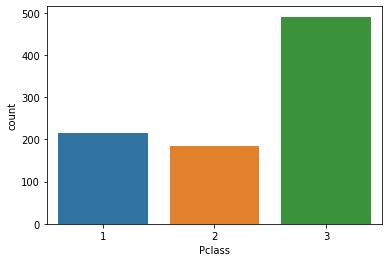

In [31]:
sns.countplot(x = "Pclass", data = train) # countplot, barplot

<AxesSubplot:xlabel='Pclass', ylabel='count'>

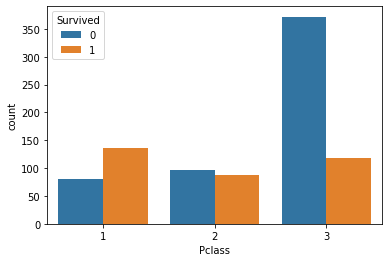

In [32]:
sns.countplot(x = "Pclass", hue = "Survived", data = train) # countplot, barplot

* 3등급의 승객은 많은 사람이 사망했다. 생존자에 비해 3배 이상
* 1등급은 역으로 생존자가 많았다.
* 왜 3등급은 많은 사람이 사망했지? -> 원인 분석 & 솔루션 제공
* 왜 1등급의 생존자가 많은 걸까?

### 02 성별 생존자

<AxesSubplot:xlabel='Sex', ylabel='count'>

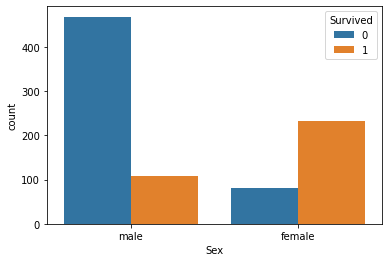

In [36]:
sns.countplot(x = "Sex", hue = "Survived", data = train)

* 탑승자가 남성이 여성보다 더 많다.

<AxesSubplot:xlabel='Age', ylabel='count'>

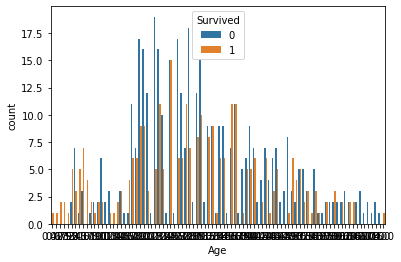

In [37]:
sns.countplot(x = "Age", hue = "Survived", data = train)

* boxplot, countplot, barblot, lmplot
> [가설1] 1등급은 여성이 많아서 생존자가 많은 것이 아닐까?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

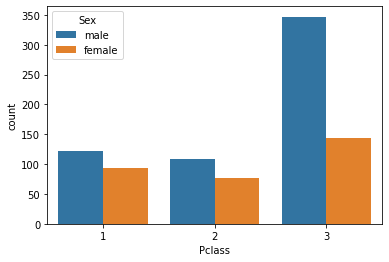

In [38]:
sns.countplot(x = "Pclass", hue = "Sex", data = train)

* boxplot, countplot, barblot, lmplot
> [가설1] 1등급은 여성이 많아서 생존자가 많은 것이 아닐까?
>> [분석1] 1등급은 여성이 많기 때문에 생존자가 많은 것은 아니다.
>>> [가설2] 나이가 영향을 끼치지 않을까?

<AxesSubplot:xlabel='Age', ylabel='Count'>

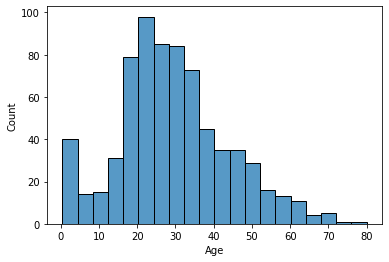

In [39]:
# 전체적인 histogram -> 수치의 분포 확인 
sns.histplot(x = "Age", data = train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

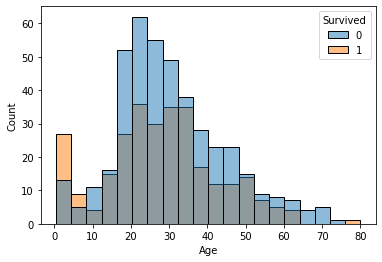

In [40]:
# 전체적인 histogram -> 수치의 분포 확인 
sns.histplot(x = "Age", hue = "Survived", data = train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

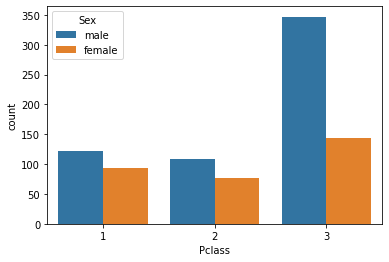

In [41]:
sns.countplot(x = "Pclass", hue = "Sex", data = train)

### 1등급의 사람들을 뽑고, 1등급의 데이터를 가지고 histogram 그려보기

In [47]:
train_p1 = train[train['Pclass']==1]   # 데이터에서 Pclass:1만 가져오기
train_p2 = train[train['Pclass']==2]   # 데이터에서 Pclass:2만 가져오기
train_p3 = train[train['Pclass']==3]   # 데이터에서 Pclass:3만 가져오기

<AxesSubplot:xlabel='Age', ylabel='Count'>

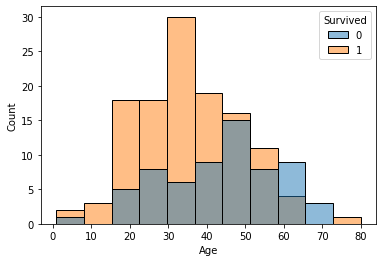

In [44]:
sns.histplot(x = "Age", hue = "Survived", data = train_p1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

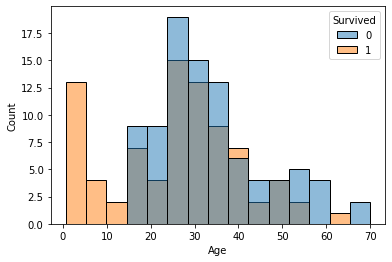

In [45]:
sns.histplot(x = "Age", hue = "Survived", data = train_p2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

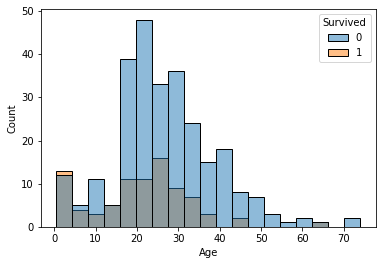

In [46]:
sns.histplot(x = "Age", hue = "Survived", data = train_p3)

* 1등급 50대 후반 이상의 사망율이 높은 편이다.
* 2등급 15세 이하 생존률이 100%, 30대 후반 이상은 생존률이 낮다.
* 3등급은 30대 후반 이하 생존률이 30대 후반 이상보다 높다.
* 좌석의 등급이 높을수록 상대적으로 생존률이 높았다.

[가설3] 3등급의 사망자가 많은 이유는 남성이 3등급이 많아서 그런 것이 아닐까?

In [48]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
# 01 Embarked의 영향
# 02 Fare(요금)의 영항

### 01 Embarked의 영향

In [52]:
# sns.countplot : 막대그래프, x축 존재, y축(데이터 개수)
# sns.boxplot : 최대값, 최소값, 중앙값, 이상치, 25%, 75%
# sns.lmplot(x = "", y = "", hue = "", data = )
# sns.pairplot() : 그래프 여러개(하나의 변수와 다른 변수의 상관관계보기)
# sns.heatmap()
# sns.histplot() : 히스토그램(수치형 컬럼에 대한 분포 등을 확인)
# sns.barplot()  : 막대그래프, x축은 범주형, y축은 그 값의 평균

<AxesSubplot:xlabel='Sex', ylabel='Age'>

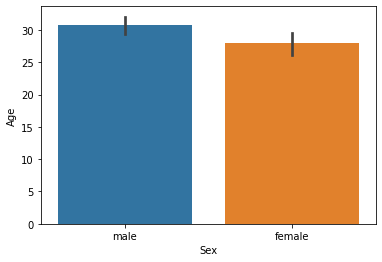

In [51]:
sns.barplot(x = "Sex", y = "Age", data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

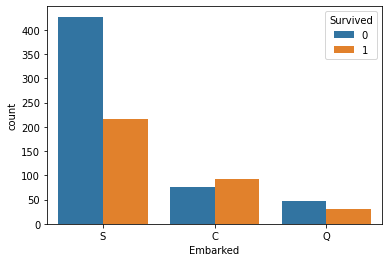

In [56]:
# Embarked의 영향
sns.countplot(x = "Embarked", hue = "Survived", data = train)

### 분석
* S 항구의 탑승 인원이 가장 많다.
* S 항구의 생존자가 많다.
* C 항구의 탑승 인원 중 생존자가 사망자보다 많다.
    * C 항구의 탑승 인원 중 생존자가 많은 이유는?
* Q 항구의 탑승 인원이 적다.
    * 내린 사람도 있을 수 있다.
* 항구의 규모도 영향이 있을 수 있겠다.

#### C = Cherbourg, Q = Queenstown, S = Southampton
### C 항구의 생존자가 많다. 왜 그럴까?

<AxesSubplot:xlabel='Embarked', ylabel='count'>

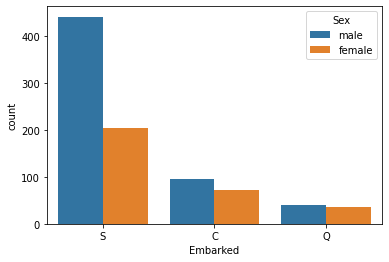

In [59]:
train.columns
sns.countplot(x = "Embarked", hue = "Sex", data = train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

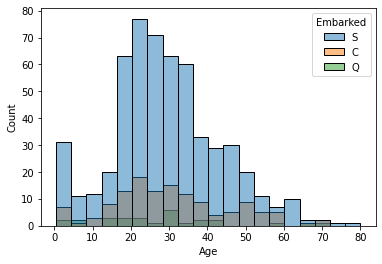

In [61]:
sns.histplot(x = "Age", hue = "Embarked", data = train)

In [67]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='count'>

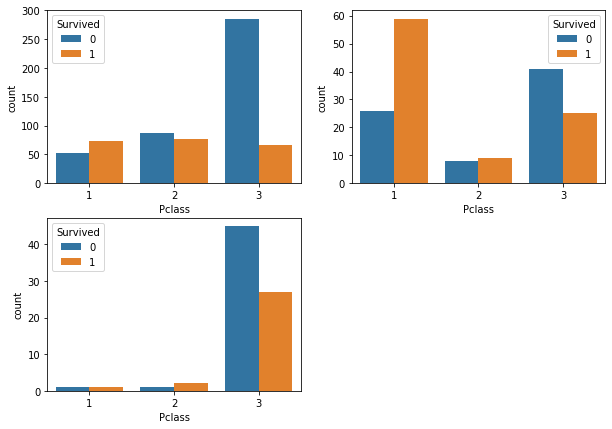

In [68]:
train_cs = train[train['Embarked']== 'S']   # 데이터에서 Embarked:S만 가져오기
train_cc = train[train['Embarked']== 'C']   # 데이터에서 Embarked:C만 가져오기
train_cq = train[train['Embarked']== 'Q']   # 데이터에서 Embarked:Q만 가져오기

plt.figure(figsize = (10, 7))

plt.subplot(2, 2, 1)
sns.countplot(x = "Pclass", hue = "Survived", data = train_cs)

plt.subplot(2, 2, 2)
sns.countplot(x = "Pclass", hue = "Survived", data = train_cc)

plt.subplot(2, 2, 3)
sns.countplot(x = "Pclass", hue = "Survived", data = train_cq)

* C 항구의 탑승자가 다른 항구의 탑승자에 비해 1등급 승객의 비율이 높았다.